# Hugging Face - Medical and Healthcare resources

This notebook is meant as a prototype for extracting resources from Hugging Face using Selenium.

In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

import pandas as pd
import matplotlib.pyplot as plt

import datetime as dt
import mplhep as hep

In [2]:
plt.style.use([hep.style.ROOT, hep.style.firamath])

In [3]:
chrome_options = Options()
chrome_options.add_argument("--headless")

In [4]:
chrome_driver_path = "/Users/xavier/Documents/development/chromedriver_chrome102"

In [5]:
driver = webdriver.Chrome(executable_path=chrome_driver_path, options=chrome_options)

## Starting with medical datasets

In [6]:
url = "https://huggingface.co/datasets?search=medical"

In [7]:
driver.get(url)

__Getting all datasets__

In [8]:
datasets = driver.find_elements_by_class_name("overview-card-wrapper")

In [9]:
# First relevant information, number of datasets
len(datasets)

20

In [10]:
datasets[0].text

'medical_questions_pairs\nPreview\n•\nUpdated Feb 18\n•\n817\n•\n3'

In [11]:
# Template is "name \n Preview [optional] \n Updated \n Downloads \n likes [optional]"

__Extracting information from datasets__

In [12]:
def extract_dataset_headers(dataset):

    split = dataset.text.split('\n')

    if "Preview" in split:
        thr = 2
    else:
        thr = 0

    name = split[0]
    updated = split[1+thr].replace("Updated ", "")
    downloads = split[3+thr]
    link = dataset.find_element_by_css_selector('a').get_attribute('href')

    dict_dataset = {
        "name": name,
        "updated": updated,
        "downloads": downloads,
        "link": link,
    }

    return dict_dataset

In [13]:
extract_dataset_headers(datasets[0])

{'name': 'medical_questions_pairs',
 'updated': 'Feb 18',
 'downloads': '817',
 'link': 'https://huggingface.co/datasets/medical_questions_pairs'}

In [14]:
list_datasets = []

for dataset in datasets:
    list_datasets.append(extract_dataset_headers(dataset))

__Creating dataframe__

In [15]:
df_med_datasets = pd.DataFrame(list_datasets)

In [16]:
df_med_datasets.head()

,name,updated,downloads,link
0,medical_questions_pairs,Feb 18,817,https://huggingface.co/datasets/medical_questi...
1,medical_dialog,about 1 month ago,343,https://huggingface.co/datasets/medical_dialog
2,swedish_medical_ner,about 1 month ago,252,https://huggingface.co/datasets/swedish_medica...
3,qanastek/ELRC-Medical-V2,Feb 18,218,https://huggingface.co/datasets/qanastek/ELRC-...
4,blinoff/medical_qa_ru_data,24 days ago,116,https://huggingface.co/datasets/blinoff/medica...


__Converting date__

In [17]:
def convert_updated(updated):
    if "days ago" in updated:
        shift = int(updated.split(" ")[0])
        new_date = dt.datetime.today() - dt.timedelta(days=shift)
    elif "month ago" in updated:
        new_date = dt.datetime.today()
        shift = int(updated.split(" ")[1])
        new_date = dt.datetime.today() - dt.timedelta(days=30*shift)
    else:
        if "," not in updated:
            updated = updated + ", 2022"
        new_date = dt.datetime.strptime(updated, "%b %d, %Y")
    return new_date

In [18]:
df_med_datasets.updated = df_med_datasets.updated.apply(convert_updated)

In [19]:
df_med_datasets.head()

,name,updated,downloads,link
0,medical_questions_pairs,2022-02-18 00:00:00.000000,817,https://huggingface.co/datasets/medical_questi...
1,medical_dialog,2022-05-21 09:18:08.040424,343,https://huggingface.co/datasets/medical_dialog
2,swedish_medical_ner,2022-05-21 09:18:08.040436,252,https://huggingface.co/datasets/swedish_medica...
3,qanastek/ELRC-Medical-V2,2022-02-18 00:00:00.000000,218,https://huggingface.co/datasets/qanastek/ELRC-...
4,blinoff/medical_qa_ru_data,2022-05-27 09:18:08.040475,116,https://huggingface.co/datasets/blinoff/medica...


__Converting downloads__

In [20]:
def convert_downloads(downloads):
    if "k" in downloads:
        downloads = 1000*float(downloads[:-1])
    else:
        downloads = int(downloads)
    return downloads

In [21]:
df_med_datasets.downloads = df_med_datasets.downloads.apply(convert_downloads)

In [22]:
df_med_datasets.head()

,name,updated,downloads,link
0,medical_questions_pairs,2022-02-18 00:00:00.000000,817,https://huggingface.co/datasets/medical_questi...
1,medical_dialog,2022-05-21 09:18:08.040424,343,https://huggingface.co/datasets/medical_dialog
2,swedish_medical_ner,2022-05-21 09:18:08.040436,252,https://huggingface.co/datasets/swedish_medica...
3,qanastek/ELRC-Medical-V2,2022-02-18 00:00:00.000000,218,https://huggingface.co/datasets/qanastek/ELRC-...
4,blinoff/medical_qa_ru_data,2022-05-27 09:18:08.040475,116,https://huggingface.co/datasets/blinoff/medica...


__Extracting contributors__

In [23]:
def extract_contributor(name):
    if "/" in name:
        contributor = name.split("/")[0]
    else:
        contributor = "None"
    return contributor

In [24]:
df_med_datasets["contributor"] = df_med_datasets.name.apply(extract_contributor)

In [25]:
df_med_datasets.head()

,name,updated,downloads,link,contributor
0,medical_questions_pairs,2022-02-18 00:00:00.000000,817,https://huggingface.co/datasets/medical_questi...,None
1,medical_dialog,2022-05-21 09:18:08.040424,343,https://huggingface.co/datasets/medical_dialog,None
2,swedish_medical_ner,2022-05-21 09:18:08.040436,252,https://huggingface.co/datasets/swedish_medica...,None
3,qanastek/ELRC-Medical-V2,2022-02-18 00:00:00.000000,218,https://huggingface.co/datasets/qanastek/ELRC-...,qanastek
4,blinoff/medical_qa_ru_data,2022-05-27 09:18:08.040475,116,https://huggingface.co/datasets/blinoff/medica...,blinoff


__Checking popularity__

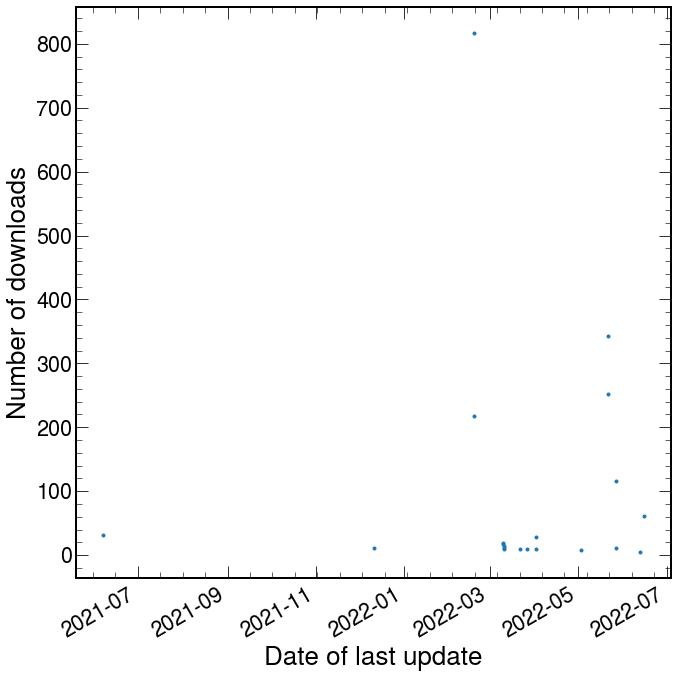

In [26]:
(df_med_datasets.plot(x="updated", y="downloads", legend=None, linestyle='None', marker="."))
plt.xlabel('Date of last update')
plt.ylabel('Number of downloads')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Dataset Name')

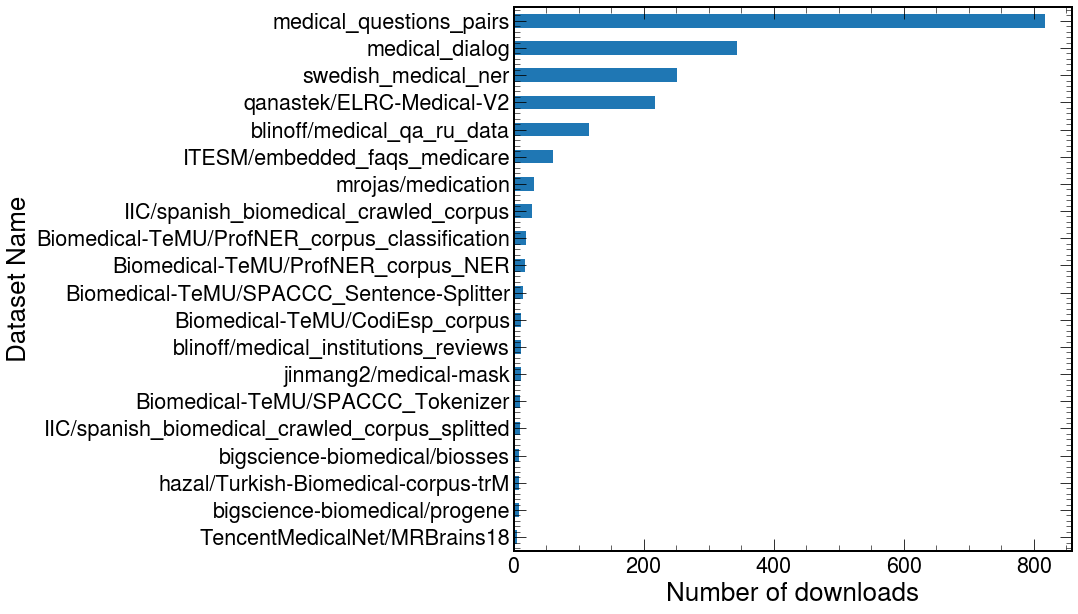

In [27]:
(
    df_med_datasets
        .sort_values(by="downloads", ascending="False")
        .plot
        .barh(x="name", y="downloads", legend=None)
)
plt.xlabel("Number of downloads")
plt.ylabel("Dataset Name")

## Moving to medical models

In [28]:
url = "https://huggingface.co/models?search=medical"

In [29]:
driver.get(url)

__Getting all models__

In [30]:
models = driver.find_elements_by_class_name("overview-card-wrapper")

In [31]:
len(models)

30

In [32]:
models[0].text

'PlanTL-GOB-ES/roberta-base-biomedical-clinical-es\nFill-Mask\n•\nUpdated Apr 8\n•\n3.02k\n•\n4'

In [33]:
# Template is "name \n Category [optional] \n Updated \n Downloads \n likes [optional]"

__Extracting information from models__

In [34]:
def extract_model_headers(model):

    split = model.text.split('\n')

    if "Updated" in split[1]:
        thr = 0
    else:
        thr = 2

    name = split[0]
    task = split[1] if thr==2 else "None"
    updated = split[1+thr].replace("Updated ", "")
    downloads = split[3+thr]
    link = model.find_element_by_css_selector('a').get_attribute('href')

    # print(name, task, updated, downloads, link)
    dict_model = {
        "name": name,
        "task": task,
        "updated": updated,
        "downloads": downloads,
        "link": link,
    }

    return dict_model

In [35]:
extract_model_headers(models[0])

{'name': 'PlanTL-GOB-ES/roberta-base-biomedical-clinical-es',
 'task': 'Fill-Mask',
 'updated': 'Apr 8',
 'downloads': '3.02k',
 'link': 'https://huggingface.co/PlanTL-GOB-ES/roberta-base-biomedical-clinical-es'}

In [36]:
extract_model_headers(models[23])

{'name': 'healx/biomedical-dpr-ctx-encoder',
 'task': 'None',
 'updated': 'Nov 11, 2021',
 'downloads': '14',
 'link': 'https://huggingface.co/healx/biomedical-dpr-ctx-encoder'}

In [37]:
list_models = []

for model in models:
    list_models.append(extract_model_headers(model))

__Creating model dataframe__

In [38]:
df_med_models = pd.DataFrame(list_models)

In [39]:
df_med_models.head()

,name,task,updated,downloads,link
0,PlanTL-GOB-ES/roberta-base-biomedical-clinical-es,Fill-Mask,Apr 8,3.02k,https://huggingface.co/PlanTL-GOB-ES/roberta-b...
1,ajitrajasekharan/biomedical,Fill-Mask,Feb 5,540,https://huggingface.co/ajitrajasekharan/biomed...
2,PlanTL-GOB-ES/roberta-base-biomedical-es,Fill-Mask,Apr 8,470,https://huggingface.co/PlanTL-GOB-ES/roberta-b...
3,alibaba-pai/pai-dkplm-medical-base-zh,Fill-Mask,May 17,305,https://huggingface.co/alibaba-pai/pai-dkplm-m...
4,BSC-TeMU/roberta-base-biomedical-es,Fill-Mask,"Oct 21, 2021",207,https://huggingface.co/BSC-TeMU/roberta-base-b...


__Preprocessing__

In [40]:
df_med_models.updated = df_med_models.updated.apply(convert_updated)

In [41]:
df_med_models.downloads = df_med_models.downloads.apply(convert_downloads)

__Adding information__

In [42]:
df_med_models["contributor"] = df_med_models.name.apply(extract_contributor)

In [43]:
df_med_models.head()

,name,task,updated,downloads,link,contributor
0,PlanTL-GOB-ES/roberta-base-biomedical-clinical-es,Fill-Mask,2022-04-08,3020.0,https://huggingface.co/PlanTL-GOB-ES/roberta-b...,PlanTL-GOB-ES
1,ajitrajasekharan/biomedical,Fill-Mask,2022-02-05,540.0,https://huggingface.co/ajitrajasekharan/biomed...,ajitrajasekharan
2,PlanTL-GOB-ES/roberta-base-biomedical-es,Fill-Mask,2022-04-08,470.0,https://huggingface.co/PlanTL-GOB-ES/roberta-b...,PlanTL-GOB-ES
3,alibaba-pai/pai-dkplm-medical-base-zh,Fill-Mask,2022-05-17,305.0,https://huggingface.co/alibaba-pai/pai-dkplm-m...,alibaba-pai
4,BSC-TeMU/roberta-base-biomedical-es,Fill-Mask,2021-10-21,207.0,https://huggingface.co/BSC-TeMU/roberta-base-b...,BSC-TeMU


__Extracting some insights__

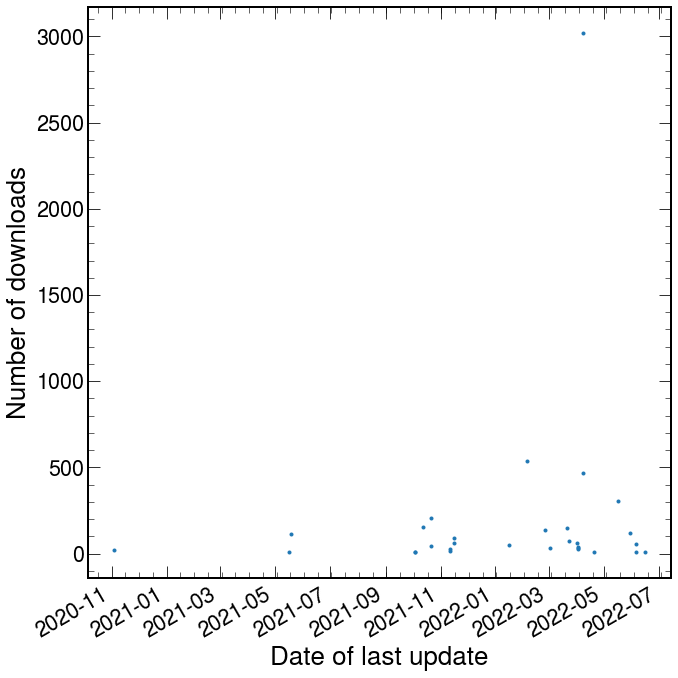

In [44]:
(df_med_models.plot(x="updated", y="downloads", legend=None, linestyle='None', marker="."))
plt.xlabel('Date of last update')
plt.ylabel('Number of downloads')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Model Name')

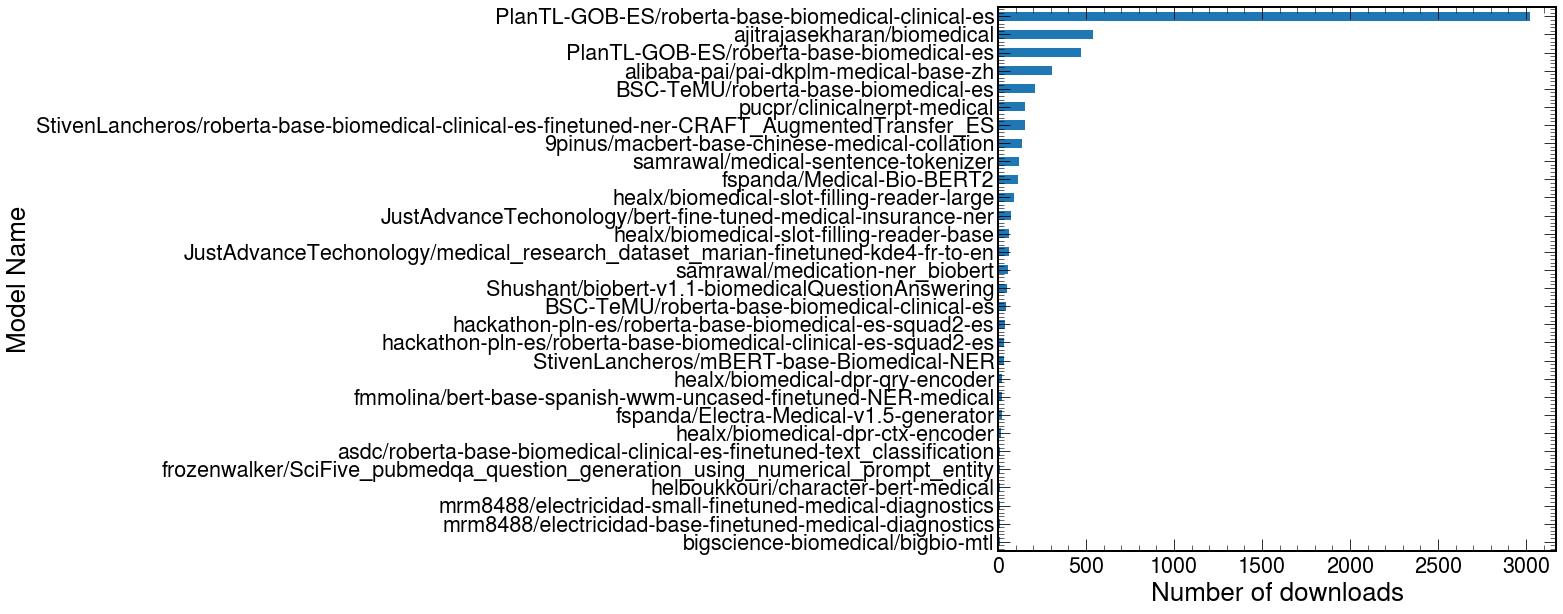

In [45]:
(
    df_med_models
        .sort_values(by="downloads", ascending="False")
        .plot
        .barh(x="name", y="downloads", legend=None)
)
plt.xlabel("Number of downloads")
plt.ylabel("Model Name")

Text(0, 0.5, 'Task Name')

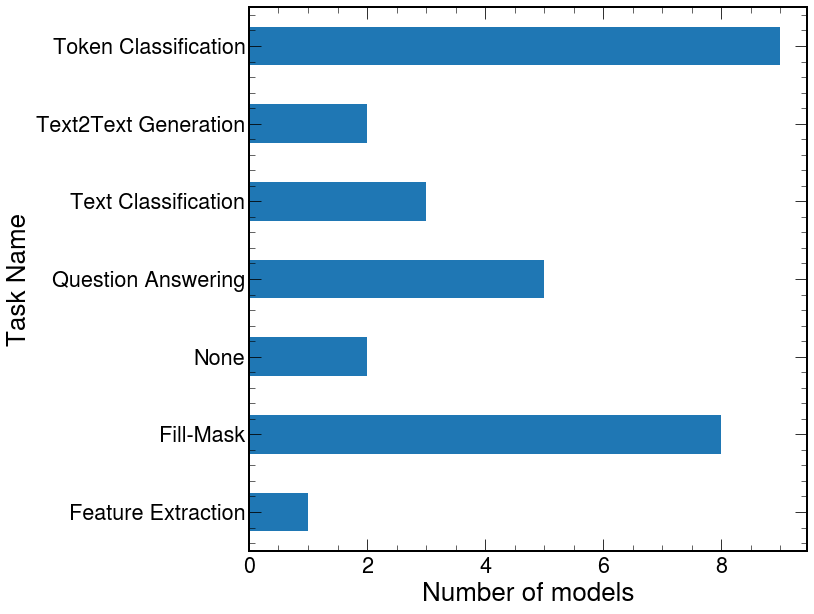

In [46]:
(
    df_med_models[["name", "task"]]
        .groupby("task")
        .count()
        .plot
        .barh(legend=None)
)
plt.xlabel("Number of models")
plt.ylabel("Task Name")

In [47]:
time_sorted_df = df_med_models.sort_values(by="updated", ascending=True).reset_index().drop(columns="index")

In [48]:
time_sorted_df.head()

,name,task,updated,downloads,link,contributor
0,fspanda/Electra-Medical-v1.5-generator,Fill-Mask,2020-11-04,21.0,https://huggingface.co/fspanda/Electra-Medical...,fspanda
1,helboukkouri/character-bert-medical,None,2021-05-17,11.0,https://huggingface.co/helboukkouri/character-...,helboukkouri
2,fspanda/Medical-Bio-BERT2,Fill-Mask,2021-05-19,113.0,https://huggingface.co/fspanda/Medical-Bio-BERT2,fspanda
3,mrm8488/electricidad-small-finetuned-medical-d...,Text Classification,2021-10-04,11.0,https://huggingface.co/mrm8488/electricidad-sm...,mrm8488
4,mrm8488/electricidad-base-finetuned-medical-di...,Text Classification,2021-10-04,11.0,https://huggingface.co/mrm8488/electricidad-ba...,mrm8488


In [49]:
counts = pd.get_dummies(time_sorted_df['task']).cumsum()
counts = counts.rename(columns=lambda col: col)

In [50]:
time_sorted_df = pd.concat([time_sorted_df, counts], axis=1)

In [51]:
time_sorted_df.head()

,name,task,updated,downloads,link,contributor,Feature Extraction,Fill-Mask,None,Question Answering,Text Classification,Text2Text Generation,Token Classification
0,fspanda/Electra-Medical-v1.5-generator,Fill-Mask,2020-11-04,21.0,https://huggingface.co/fspanda/Electra-Medical...,fspanda,0,1,0,0,0,0,0
1,helboukkouri/character-bert-medical,None,2021-05-17,11.0,https://huggingface.co/helboukkouri/character-...,helboukkouri,0,1,1,0,0,0,0
2,fspanda/Medical-Bio-BERT2,Fill-Mask,2021-05-19,113.0,https://huggingface.co/fspanda/Medical-Bio-BERT2,fspanda,0,2,1,0,0,0,0
3,mrm8488/electricidad-small-finetuned-medical-d...,Text Classification,2021-10-04,11.0,https://huggingface.co/mrm8488/electricidad-sm...,mrm8488,0,2,1,0,1,0,0
4,mrm8488/electricidad-base-finetuned-medical-di...,Text Classification,2021-10-04,11.0,https://huggingface.co/mrm8488/electricidad-ba...,mrm8488,0,2,1,0,2,0,0


In [52]:
cumulative_columns = set(time_sorted_df["task"])

Text(0, 0.5, 'Number of models')

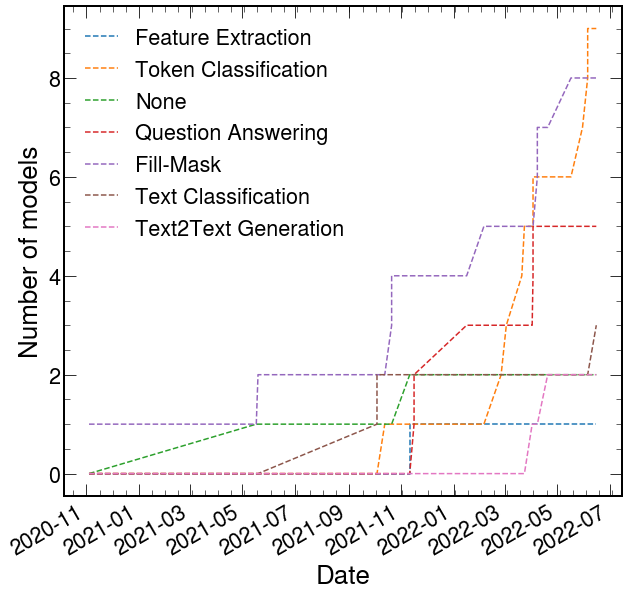

In [53]:
(
    time_sorted_df
    .plot(x="updated", y=cumulative_columns, linestyle="--")
)
plt.xlabel("Date")
plt.ylabel("Number of models")